
# **Lista 07 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff

---

# Problema 1: Operações morfológicas

A imagem abaixo possui círculos e quadrados de vários tamanhos. Alguns objetos possuem um ou dois buracos dentro deles. Forneça um algoritmo que use operações morfológicas e lógicas para responder às perguntas abaixo.


![picture](https://drive.google.com/uc?export=view&id=11T1R5qEkMNTXKMAVujfwYcw2UCzawMHr)


**1.1** Que fração dos pixels da imagem são brancos? Quantos objetos a imagem possui?

**1.2** Quantos buracos há na imagem? Quantos objetos tˆem mais de um buraco?

**1.3** Quantos quadrados e círculos a imagem possui?

**1.4** Identifique os objetos quadrados que possuem buracos e os objetos circulares que não possuem buracos?

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 
from matplotlib import pyplot as plt 

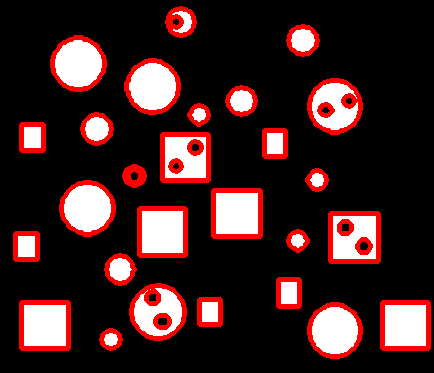

In [19]:
img = cv2.imread('Morfologia.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th, tresh = cv2.threshold(gray,254,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(tresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours,-1,(0,0,255),3)
cv2_imshow(img)
cv2.waitKey(0)

In [20]:
print("A imagem possui ",len(contours)," objetos entre quadrados, circulos e buracos. ")

A imagem possui  37  objetos entre quadrados, circulos e buracos. 


In [ ]:
img = cv2.imread("Morfologia.png", cv2.IMREAD_GRAYSCALE)
square = 0
circle = 0
square_hole   = 0
circle_unhole = 0
more_than_one_hole = 0

In [22]:
linhas, colunas = img.shape
ffll = thresh.copy()
h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(ffll, mask, (0,0), 255)
ffll_inv = cv2.bitwise_not(ffll)
sem_buracos = thresh + ffll_inv
sem_buracos_copy = sem_buracos.copy()


for i in range(len(contours)):
	zeros_img_aux = np.zeros([linhas, colunas], dtype = np.uint8)
	cv2.drawContours(zeros_img_aux, contours, i, 255, 1)
	
	th, thresh_aux = cv2.threshold(zeros_img_aux, 250, 255, cv2.THRESH_BINARY)

	floodfill_aux = thresh_aux.copy()
	h, w = thresh_aux.shape[:2]
	mask = np.zeros((h+2, w+2), np.uint8)

	cv2.floodFill(floodfill_aux, mask, (0,0), 255)
	
	ffll_inv_aux = cv2.bitwise_not(floodfill_aux)
	aux_without_hole  = thresh_aux + ffll_inv_aux

	contours_aux, hierarchy_aux = cv2.findContours(aux_without_hole*thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	if len(contours[i]) == 4:
		square += 1

	if len(contours_aux) > 2:
		more_than_one_hole += 1

	if len(contours[i]) == 4 and len(contours_aux) > 1:
		cv2.imwrite('square/'+str(i)+'.png', 255*(aux_without_hole*thresh))

	if len(contours[i]) > 4 and len(contours_aux) == 1:
		cv2.imwrite('circle/'+str(i)+'.png', 255*(aux_without_hole*thresh))


In [17]:
contours_hole, hierarchy_hole = cv2.findContours(floodfill_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('No total, são %d buracos'%(len(contours_hole)))

Tem 10 buracos na imagem


In [26]:
print('Dos objetos, $d têm mais de um buraco %d'%(more_than_one_hole))

Quantidade de Objetos com mais de um buraco: 8


In [27]:
print('Dos objetos, %d são quadrados e %d são circulos'%(square, len(contours) - square))

Dos objetos, 22 são quadrados e 15 são circulos


In [25]:
print('%f%% dos pixels sao brancos'%(100.0*sum(sum(thresh/255.0))/(linhas*colunas)))

20.569921% dos pixels sao brancos


# Problema 2

**2.1**  Implemente o algoritmo de afinamento descrito no livro texto. O passo final do seu algoritmo deve ser a conversão  do conjunto afinado final para conectividade-m (veja a Seção 2.5.2) para eliminar caminhos múltiplos. 

**2.2** Implemente o algortimo de poda descrito no livro texto com o objetivo de limpar o esqueleto gerado na questão anterior. 

**2.3** Utilize os algoritmos implementados nos itens anteriores para gerar os esqueletos das imagens abaixo. 






<figure>
<center>
<img src='https://docs.google.com/uc?id=1tbziZBshI5EHshJLf_gPXkG457JczJCu' width="320" height="240"/> <img src='https://docs.google.com/uc?id=1fi-tXN2_Kx5gb4AQZd9KeZAwQZH8jpis' width="228" height="232"/>
</center>
</figure>
<figure>
<center>
<img src='https://docs.google.com/uc?id=1EGte7NZ6uqxZaCSN64Q608I0xet4nj60' width="200" height="180"/>
<img src='https://docs.google.com/uc?id=1oAby2lC7sf6AwmjJPKzcCSFyVML0W5_x' width="256" height="256"/>
</center>
</figure>


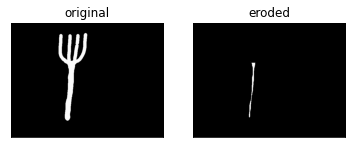

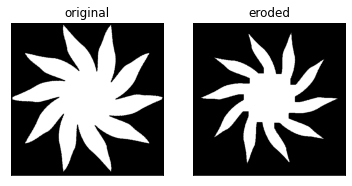

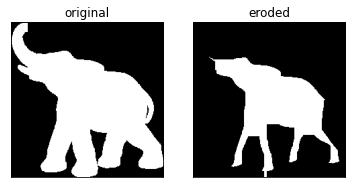

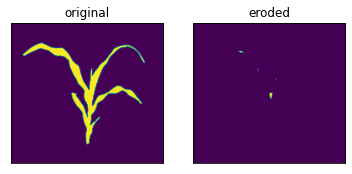

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = ['fork-20.png', 'flower.png', 'elephant.png', 'cropped_mask_image.jpg']
for img in path:
  img = cv2.imread(img, cv2.COLOR_BGR2GRAY)
  kenel=np.ones((5,5),np.uint8)
  erosion=cv2.erode(img,kenel,iterations=4)
  plt.subplot(1,2,1),plt.imshow(img)
  plt.title('original'),plt.xticks([]),plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(erosion)
  plt.title('eroded'),plt.xticks([]),plt.yticks([])
  plt.show()